In [1]:
import numpy as np
import pandas as pd
import warnings
import gc
from tqdm import tqdm_notebook
import xgboost as xgb
import lightgbm as lgb
from scipy.sparse import vstack, csr_matrix, save_npz, load_npz
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import roc_auc_score
warnings.filterwarnings("ignore")
gc.enable()
sns.set()

In [2]:
pd.set_option('max_rows', 200)
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train.shape, test.shape

((200000, 202), (200000, 201))

In [70]:
col_list = train.columns[2:]

# unique 갯수

In [84]:
data = train.append(test)

In [86]:
unique_cnt = {"train":[], "test": [], "total": []}

In [87]:
for col in tqdm_notebook(col_list):
    unique_cnt['train'].append(train[col].unique().__len__())

In [88]:
for col in tqdm_notebook(col_list):
    unique_cnt['test'].append(test[col].unique().__len__())

In [89]:
for col in tqdm_notebook(col_list):
    unique_cnt['total'].append(data[col].unique().__len__())

In [93]:
unique_cnt = pd.DataFrame(unique_cnt, index=col_list)

In [422]:
unique_cnt.sort_values('total')

train   test   total
var_68      451    428     461
var_91     7962   7569    8197
var_108    8525   8188    8651
var_103    9376   8828    9634
var_12     9561   9121    9737
var_148   10608   9964   10894
var_161   11071  10506   11359
var_71    13527  12604   13968
var_25    14853  13728   15348
var_43    15188  14288   15589
var_125   16059  14744   16719
var_166   17902  16683   18408
var_169   18242  16759   18846
var_133   19236  17411   20070
var_15    19810  18253   20456
var_131   21464  19765   22251
var_23    24913  22619   25982
var_34    25164  22954   26159
var_93    26708  23637   28147
var_95    29387  26068   30656
var_42    31592  28163   33148
var_126   32411  29224   33832
var_50    32308  28412   33910
var_98    33266  29142   34913
var_53    33460  29631   35047
var_57    35545  31286   37418
var_28    35859  31321   37923
var_130   36638  32095   38626
var_59    37744  32888   39579
var_6     38599  33273   40882
var_105   39115  33485   41781
var_156   40634  35466   42711
var_144   40595  35056   42880
var_197   40537  34817   43049
var_189   41764  36220   43938
var_114   43084  36606   45754
var_111   46464  38860   49654
var_66    47722  40071   51090
var_9     49417  41583   52361
var_79    53212  44041   56828
var_181   56164  45307   61136
var_162   57396  46306   62106
var_132   57923  46669   62482
var_195   57870  46482   62852
var_64    59379  47632   64227
var_192   59065  47041   64383
var_27    60185  48428   64803
var_112   60482  48537   64989
var_4     63515  49995   68881
var_116   63467  50209   68886
var_121   64695  50805   70291
var_99    69300  53278   76630
var_106   71065  54037   78860
var_78    72254  54942   79492
var_104   72627  55066   80723
var_153   73728  55749   80978
var_3     74597  56507   82683
var_62    74777  55891   83636
var_31    77388  57146   86666
var_14    79122  58951   87902
var_37    79040  58742   88044
var_81    79065  58200   89038
var_150   83660  60849   93927
var_146   84314  60676   96032
var_88    84918  61261   96301
var_177   85720  61780   96353
var_32    85964  61890   97070
var_2     86555  61865   98770
var_115   86729  61894   98865
var_16    86918  61906   99063
var_29    88339  62618  101061
var_94    89146  63414  101490
var_179   90090  63473  104157
var_22    90660  63855  104213
var_124   91022  63864  104617
var_175   92659  64937  106617
var_46    93450  65189  107970
var_191   94266  65460  109159
var_198   94153  65262  109176
var_143   94372  65590  109365
var_0     94672  65580  109897
var_127   95710  66401  110689
var_152   95823  66139  111057
var_36    96404  66309  112088
var_194   97069  66942  112278
var_63    97098  66913  112727
var_168   97227  66656  113423
var_128   98200  67606  114174
var_8     98617  67521  114347
var_186   98060  67204  114414
var_7    103063  69487  120784
var_56   103045  69316  121547
var_89   103522  69297  122361
var_24   105101  70202  124050
var_77   106809  71025  126114
var_110  106121  70177  126501
var_85   108437  71490  128759
var_65   108347  71421  129079
var_145  108526  71625  129375
var_188  108813  71322  129661
var_1    108932  71661  130006
var_151  109667  72184  130986
var_72   110114  72162  131714
var_69   110346  72217  131934
var_193  110557  72171  132689
var_92   110743  72603  132946
var_119  112403  72992  134912
var_33   112239  73157  134923
var_109  112172  73053  135029
var_39   112674  73292  135595
var_159  112830  73068  135993
var_129  113425  73434  136681
var_60   113763  73575  137503
var_170  113720  73455  137589
var_58   113907  73482  137828
var_13   115181  74037  139438
var_190  114959  73782  139601
var_38   115366  74294  140039
var_113  116496  74676  141202
var_183  117529  75174  142875
var_138  117428  75048  143406
var_154  119342  75651  146206
var_165  119403  75703  146639
var_185  120747  76106  148076
var_140  121384  76537  149123
var_52   121313  76266  149503
var_122  121767  76235  149847
var_101  122295  76802  150340
var_35   12

In [442]:
unique_cnt.sort_index()

train   test   total
var_0     94672  65580  109897
var_1    108932  71661  130006
var_10   128764  79221  161199
var_100  150727  86300  199042
var_101  122295  76802  150340
var_102  146237  84953  191504
var_103    9376   8828    9634
var_104   72627  55066   80723
var_105   39115  33485   41781
var_106   71065  54037   78860
var_107  137827  82101  176741
var_108    8525   8188    8651
var_109  112172  73053  135029
var_11   130193  79749  164156
var_110  106121  70177  126501
var_111   46464  38860   49654
var_112   60482  48537   64989
var_113  116496  74676  141202
var_114   43084  36606   45754
var_115   86729  61894   98865
var_116   63467  50209   68886
var_117  164469  90342  225330
var_118  143667  84091  187331
var_119  112403  72992  134912
var_12     9561   9121    9737
var_120  158269  88478  213513
var_121   64695  50805   70291
var_122  121767  76235  149847
var_123  129893  79307  163473
var_124   91022  63864  104617
var_125   16059  14744   16719
var_126   32411  29224   33832
var_127   95710  66401  110689
var_128   98200  67606  114174
var_129  113425  73434  136681
var_13   115181  74037  139438
var_130   36638  32095   38626
var_131   21464  19765   22251
var_132   57923  46669   62482
var_133   19236  17411   20070
var_134  131619  80100  165640
var_135  140774  83073  181695
var_136  156615  88160  210138
var_137  144397  84520  188234
var_138  117428  75048  143406
var_139  137294  81961  176347
var_14    79122  58951   87902
var_140  121384  76537  149123
var_141  134443  81076  170913
var_142  128613  79095  161277
var_143   94372  65590  109365
var_144   40595  35056   42880
var_145  108526  71625  129375
var_146   84314  60676   96032
var_147  137559  82134  176666
var_148   10608   9964   10894
var_149  148504  85452  195597
var_15    19810  18253   20456
var_150   83660  60849   93927
var_151  109667  72184  130986
var_152   95823  66139  111057
var_153   73728  55749   80978
var_154  119342  75651  146206
var_155  127457  78595  159514
var_156   40634  35466   42711
var_157  126534  78323  157648
var_158  144556  84373  188208
var_159  112830  73068  135993
var_16    86918  61906   99063
var_160  156274  88104  209977
var_161   11071  10506   11359
var_162   57396  46306   62106
var_163  123168  76976  152547
var_164  122744  77121  151783
var_165  119403  75703  146639
var_166   17902  16683   18408
var_167  140954  83182  182132
var_168   97227  66656  113423
var_169   18242  16759   18846
var_17   137823  82518  176831
var_170  113720  73455  137589
var_171  125914  77918  156684
var_172  143366  83916  186853
var_173  128120  78845  160394
var_174  134945  80987  171675
var_175   92659  64937  106617
var_176  142521  83905  184983
var_177   85720  61780   96353
var_178  145235  84537  189513
var_179   90090  63473  104157
var_18   139515  82682  179632
var_180  123477  77195  152618
var_181   56164  45307   61136
var_182  149195  85984  196629
var_183  117529  75174  142875
var_184  145184  84500  189591
var_185  120747  76106  148076
var_186   98060  67204  114414
var_187  157031  88290  211266
var_188  108813  71322  129661
var_189   41764  36220   43938
var_19   144180  84370  187485
var_190  114959  73782  139601
var_191   94266  65460  109159
var_192   59065  47041   64383
var_193  110557  72171  132689
var_194   97069  66942  112278
var_195   57870  46482   62852
var_196  125560  78038  155546
var_197   40537  34817   43049
var_198   94153  65262  109176
var_199  149430  85933  197317
var_2     86555  61865   98770
var_20   127764  78645  159515
var_21   140062  82738  180743
var_22    90660  63855  104213
var_23    24913  22619   25982
var_24   105101  70202  124050
var_25    14853  13728   15348
var_26   127089  78260  158933
var_27    60185  48428   64803
var_28    35859  31321   37923
var_29    88339  62618  101061
var_3     74597  56507   82683
var_30   145977  84985  190176
var_31    77388  57146   86666
var_32    85964  61890   97070
var_33   112239  73157  134923
var_34    2

In [425]:
unique_cnt.loc['var_64']

train    59379
test     47632
total    64227
Name: var_64, dtype: int64

# var 별 min max

In [190]:
train_desc = train.describe()

In [193]:
train_min_max = train_desc.loc[['min', 'max']].T

In [196]:
train_min_max['max-min'] = train_min_max['max'] - train_min_max['min']

In [441]:
train_min_max

min      max   max-min
target    0.0000   1.0000    1.0000
var_0     0.4084  20.3150   19.9066
var_1   -15.0434  10.3768   25.4202
var_2     2.1171  19.3530   17.2359
var_3    -0.0402  13.1883   13.2285
var_4     5.0748  16.6714   11.5966
var_5   -32.5626  17.2516   49.8142
var_6     2.3473   8.4477    6.1004
var_7     5.3497  27.6918   22.3421
var_8   -10.5055  10.1513   20.6568
var_9     3.9705  11.1506    7.1801
var_10  -20.7313  18.6702   39.4015
var_11  -26.0950  17.1887   43.2837
var_12   13.4346  14.6545    1.2199
var_13   -6.0111  22.3315   28.3426
var_14    1.0133  14.9377   13.9244
var_15   13.0769  15.8633    2.7864
var_16    0.6351  17.9506   17.3155
var_17  -33.3802  19.0259   52.4061
var_18  -10.6642  41.7480   52.4122
var_19  -12.4025  35.1830   47.5855
var_20   -5.4322  31.2859   36.7181
var_21  -10.0890  49.0443   59.1333
var_22   -5.3225  14.5945   19.9170
var_23    1.2098   4.8752    3.6654
var_24   -0.6784  25.4460   26.1244
var_25   12.7200  14.6546    1.9346
var_26  -24.2431  15.6751   39.9182
var_27   -6.1668   3.2431    9.4099
var_28    2.0896   8.7874    6.6978
var_29   -4.7872  13.1431   17.9303
var_30  -34.7984  15.6515   50.4499
var_31    2.1406  20.1719   18.0313
var_32   -8.9861   6.7871   15.7732
var_33    1.5085  29.5466   28.0381
var_34    9.8169  13.2878    3.4709
var_35  -16.5136  21.5289   38.0425
var_36   -8.0951  14.2456   22.3407
var_37   -1.1834  11.8638   13.0472
var_38   -6.3371  29.8235   36.1606
var_39  -14.5457  15.3223   29.8680
var_40  -35.2117  18.1056   53.3173
var_41   -8.5359  26.1658   34.7017
var_42    8.8590  13.4696    4.6106
var_43   10.6528  12.5779    1.9251
var_44   -9.9396  34.1961   44.1357
var_45  -90.2525  62.0844  152.3369
var_46    1.2062  21.2939   20.0877
var_47  -47.6862  20.6854   68.3716
var_48  -23.9022  54.2738   78.1760
var_49   -8.0707  41.1530   49.2237
var_50   10.3855  15.3172    4.9317
var_51  -15.0462  40.6890   55.7352
var_52  -24.7214  17.0968   41.8182
var_53    3.3449   8.2315    4.8866
var_54  -26.7786  28.5724   55.3510
var_55   -3.7826  29.0921   32.8747
var_56    2.7618  29.0741   26.3123
var_57    3.4423   9.1609    5.7186
var_58  -12.6009  20.4833   33.0842
var_59    6.1840  11.9867    5.8027
var_60   -2.1006  25.1955   27.2961
var_61  -48.8027  27.1029   75.9056
var_62   -6.3289   7.7536   14.0825
var_63  -10.5544  11.2317   21.7861
var_64    1.6117  11.1537    9.5420
var_65  -14.0888  15.7313   29.8201
var_66    1.3368   9.7132    8.3764
var_67  -19.5443  39.3968   58.9411
var_68    4.9938   5.0469    0.0531
var_69  -16.3094   8.5473   24.8567
var_70  -17.0275  64.4644   81.4919
var_71   -0.2240   1.5719    1.7959
var_72  -12.3834  14.1500   26.5334
var_73   -1.6658  44.5361   46.2019
var_74  -34.1015  70.2720  104.3735
var_75   -1.2936  36.1567   37.4503
var_76  -21.6333  34.4352   56.0685
var_77    7.4257  30.9569   23.5312
var_78   -1.8183  11.3507   13.1690
var_79   10.4454  18.2256    7.7802
var_80  -18.0422  30.4769   48.5191
var_81    7.5865  23.1324   15.5459
var_82  -30.0266  21.8934   51.9200
var_83  -24.2201  27.7143   51.9344
var_84  -24.4398  17.7424   42.1822
var_85    7.0230  32.9011   25.8781
var_86  -19.2722  34.5637   53.8359
var_87   -8.4816  33.3541   41.8357
var_88    1.3502  17.4594   16.1092
var_89   -9.6014  15.4816   25.0830
var_90  -61.7180  27.2713   88.9893
var_91    6.5218   7.4895    0.9677
var_92   -1.0185  26.9976   28.0161
var_93    8.4916  12.5343    4.0427
var_94    2.8190  18.9750   16.1560
var_95   -2.4324   1.8040    4.2364
var_96  -12.1584  40.8806   53.0390
var_97  -21.7400  58.2879   80.0279
var_98   -0.6035   4.5028    5.1063
...          ...      ...       ...
var_100 -39.1791  25.1409   64.3200
var_101   0.0757  28.4594   28.3837
var_102  -7.3829  51.3265   58.7094
var_103   0.9793   2.1887    1.2094
var_104   4.0846  19.0206   14.9360
var_105   0.7153   7.1692    6.4539
var_106   0.9424  15.3074   14.3650
var_107  -5.8980  46.3795   52.2775
var_108  13.7290  14.7430    1.0140
var_109   5.7697 

In [204]:
train_min_max[train_min_max['max-min'] < 10].sort_values('max-min')

min      max  max-min
var_68    4.9938   5.0469   0.0531
var_91    6.5218   7.4895   0.9677
target    0.0000   1.0000   1.0000
var_108  13.7290  14.7430   1.0140
var_103   0.9793   2.1887   1.2094
var_12   13.4346  14.6545   1.2199
var_148   3.3205   4.7528   1.4323
var_161   4.8526   6.3099   1.4573
var_71   -0.2240   1.5719   1.7959
var_43   10.6528  12.5779   1.9251
var_25   12.7200  14.6546   1.9346
var_125  11.4861  13.6642   2.1781
var_166   1.8512   4.2204   2.3692
var_15   13.0769  15.8633   2.7864
var_169   4.2588   7.0890   2.8302
var_133   5.3593   8.3091   2.9498
var_131  -0.9548   2.1923   3.1471
var_34    9.8169  13.2878   3.4709
var_23    1.2098   4.8752   3.6654
var_93    8.4916  12.5343   4.0427
var_95   -2.4324   1.8040   4.2364
var_126  11.2654  15.5156   4.2502
var_42    8.8590  13.4696   4.6106
var_53    3.3449   8.2315   4.8866
var_50   10.3855  15.3172   4.9317
var_98   -0.6035   4.5028   5.1063
var_130   9.5283  14.9895   5.4612
var_57    3.4423   9.1609   5.7186
var_59    6.1840  11.9867   5.8027
var_197   5.9606  12.0004   6.0398
var_6     2.3473   8.4477   6.1004
var_144   5.4443  11.8101   6.3658
var_105   0.7153   7.1692   6.4539
var_156   9.9965  16.4970   6.5005
var_189  -2.5543   4.0341   6.5884
var_114  -0.0505   6.5850   6.6355
var_28    2.0896   8.7874   6.6978
var_9     3.9705  11.1506   7.1801
var_111   2.1942   9.8002   7.6060
var_79   10.4454  18.2256   7.7802
var_66    1.3368   9.7132   8.3764
var_181   5.4165  14.3939   8.9774
var_27   -6.1668   3.2431   9.4099
var_162   0.6231  10.1344   9.5113
var_195  -5.2610   4.2729   9.5339
var_64    1.6117  11.1537   9.5420
var_132   2.8900  12.4650   9.5750

In [424]:
train_min_max[(train_min_max['min'] >= 1) & (train_min_max['max'] <= 12)].sort_values(['max-min'])

min      max  max-min
var_68   4.9938   5.0469   0.0531
var_91   6.5218   7.4895   0.9677
var_148  3.3205   4.7528   1.4323
var_161  4.8526   6.3099   1.4573
var_166  1.8512   4.2204   2.3692
var_169  4.2588   7.0890   2.8302
var_133  5.3593   8.3091   2.9498
var_23   1.2098   4.8752   3.6654
var_53   3.3449   8.2315   4.8866
var_57   3.4423   9.1609   5.7186
var_59   6.1840  11.9867   5.8027
var_6    2.3473   8.4477   6.1004
var_144  5.4443  11.8101   6.3658
var_28   2.0896   8.7874   6.6978
var_9    3.9705  11.1506   7.1801
var_111  2.1942   9.8002   7.6060
var_66   1.3368   9.7132   8.3764
var_64   1.6117  11.1537   9.5420

# Find Time

In [239]:
pd.datetime(2010,1,1).toordinal() * 24 * 60 * 60, pd.datetime(2018,1,1).toordinal() * 24 * 60 * 60

(63397987200, 63650448000)

In [237]:
pd.datetime(2010,1,1).toordinal() * 24 * 60, pd.datetime(2018,1,1).toordinal() * 24 * 60

(1056633120, 1060840800)

In [236]:
pd.datetime(2010,1,1).toordinal() * 24, pd.datetime(2018,1,1).toordinal() * 24

(17610552, 17680680)

In [208]:
pd.datetime(2010,1,1).toordinal(), pd.datetime(2018,1,1).toordinal()

(733773, 736695)

# Feature Engineering 하면 괜찮을 var 
* from count plot : var_12, var_68, var_108, var_126
* from unique value: var_68, var_91, var_108, var_103

## util

In [141]:
def sliding_window(data, window_size=1):
    iteration = int(data.shape[0] - window_size)
    result = []
    
    print("window size: {}, iteration: {}".format(window_size, iteration))
    for i in tqdm_notebook(range(iteration)):
        result.append(np.sum(data[i:i + window_size]))
    
    return result

## var_68

In [446]:
new_train = train.sort_values(['var_68'])
new_test = test.sort_values(['var_68'])

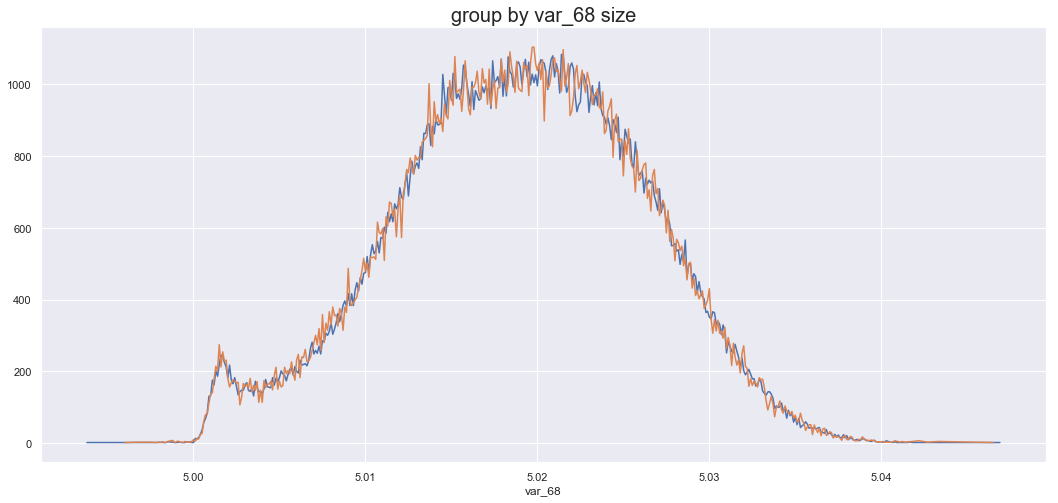

In [447]:
plt.figure(figsize=(18,8))
new_train.groupby(['var_68']).size().plot()
new_test.groupby(['var_68']).size().plot()
plt.title("group by var_68 size", fontsize=20)
plt.plot();

In [448]:
train.var_68.value_counts()

5.0214    1084
5.0215    1081
5.0209    1080
5.0183    1077
5.0179    1071
5.0208    1070
5.0193    1070
5.0202    1069
5.0174    1066
5.0203    1063
5.0189    1063
5.0195    1062
5.0220    1060
5.0204    1059
5.0211    1058
5.0188    1057
5.0157    1054
5.0158    1049
5.0219    1049
5.0190    1048
5.0201    1047
5.0221    1043
5.0207    1040
5.0192    1038
5.0212    1038
5.0184    1035
5.0205    1033
5.0151    1031
5.0185    1029
5.0197    1029
5.0227    1028
5.0145    1028
5.0226    1028
5.0199    1027
5.0216    1027
5.0194    1022
5.0181    1022
5.0177    1022
5.0210    1021
5.0152    1011
5.0176    1011
5.0162    1008
5.0236    1007
5.0187    1006
5.0228    1006
5.0175    1005
5.0198    1005
5.0159    1001
5.0196     999
5.0191     999
5.0232     997
5.0229     997
5.0200     996
5.0170     995
5.0186     993
5.0168     993
5.0218     993
5.0178     993
5.0148     991
5.0149     990
5.0172     990
5.0156     988
5.0206     986
5.0171     983
5.0164     983
5.0217     978
5.0234    

In [251]:
(train['var_68']*10000 - 7000 + epoch_datetime.toordinal()).astype(int).map(datetime.fromordinal)

0        2018-01-11
1        2018-05-02
2        2018-05-10
3        2018-05-02
4        2018-07-22
5        2018-01-12
6        2018-03-21
7        2018-01-30
8        2018-02-28
9        2018-06-08
10       2018-04-18
11       2018-06-04
12       2018-01-31
13       2018-06-16
14       2018-04-15
15       2017-12-18
16       2018-05-24
17       2018-05-23
18       2017-12-13
19       2018-06-26
20       2018-06-12
21       2018-07-01
22       2018-07-14
23       2018-09-20
24       2018-04-21
25       2018-06-26
26       2018-03-22
27       2018-08-20
28       2018-05-25
29       2018-04-14
30       2018-07-23
31       2017-12-11
32       2017-12-27
33       2018-06-06
34       2018-05-23
35       2018-02-11
36       2018-05-22
37       2018-04-20
38       2018-05-25
39       2018-04-19
40       2017-12-14
41       2018-03-12
42       2018-02-07
43       2018-05-01
44       2018-04-09
45       2018-06-25
46       2018-05-10
47       2018-06-11
48       2018-05-17
49       2018-02-16


In [245]:
epoch_datetime = pd.datetime(1900, 1, 1)
trf_var_68_s = (train['var_68']*10000 - 7000 + epoch_datetime.toordinal()).astype(int)
date_s = trf_var_68_s.map(datetime.fromordinal)
train['date'] = date_s

In [294]:
i = 0

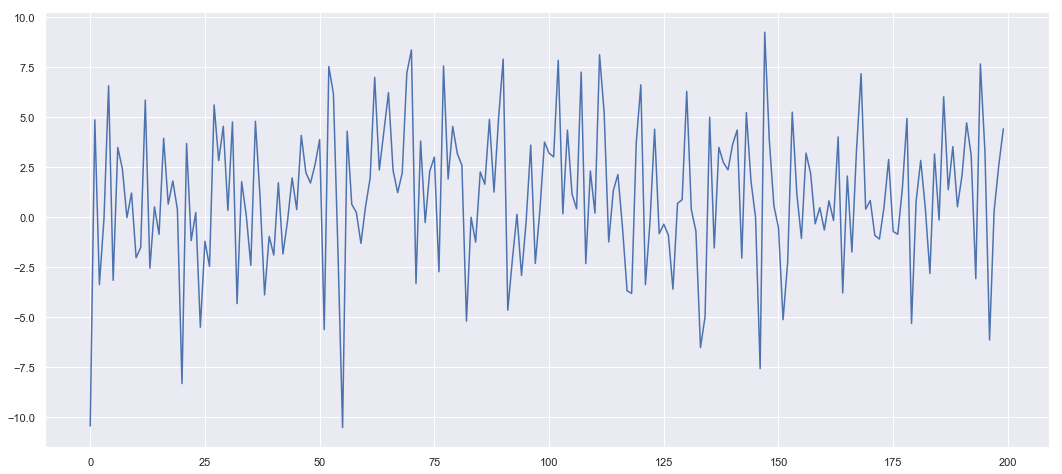

In [367]:
plt.figure(figsize=(18,8))
plt.plot(new_train.sort_values(['var_68'])['var_' + str(i)].values[:200])
i += 1

In [376]:
result = {}
for col in tqdm_notebook(col_list):
    windows = 1000
    iterations = 200000 / windows
    target = new_train.sort_values(['var_68', col]).target
    result[col] = []
    for i in range(int(iterations)):
        result[col].append(target[i * windows: (i + 1) * windows].sum())

In [377]:
time_series = pd.DataFrame(result).T

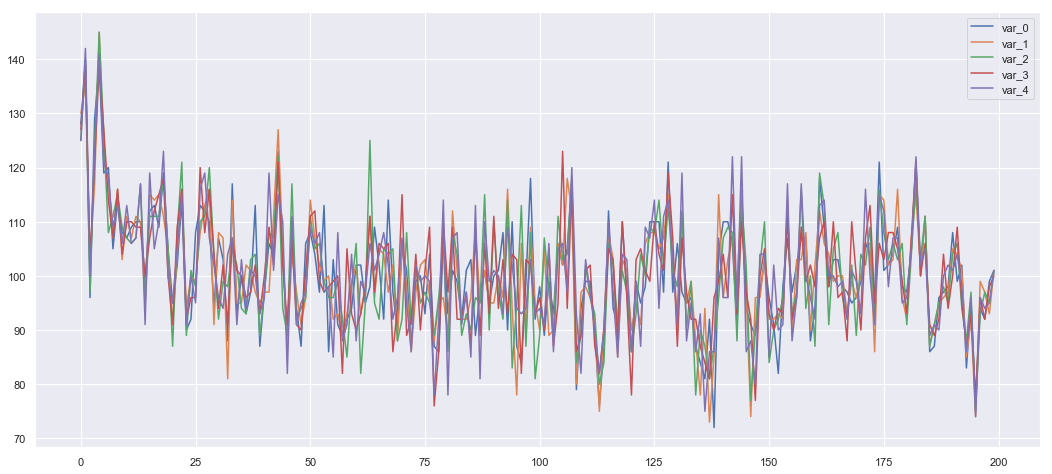

In [378]:
idx = 0
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

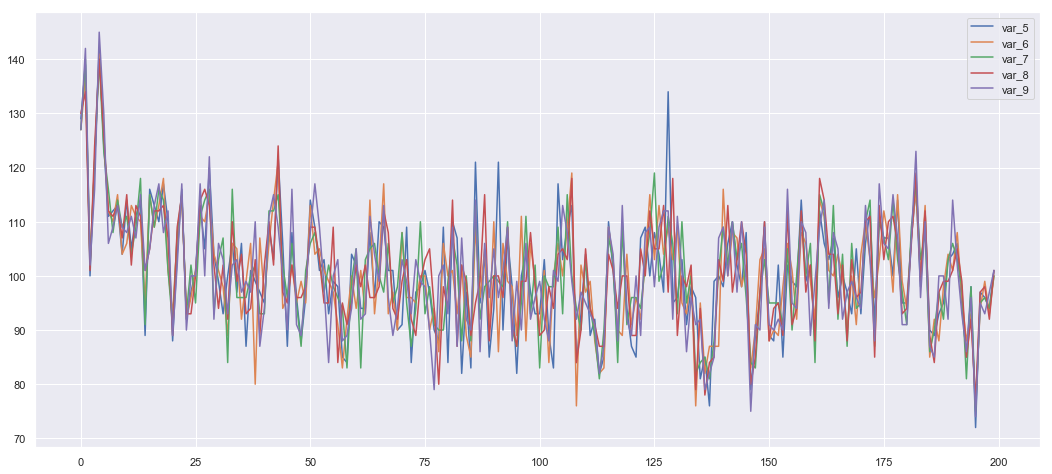

In [379]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

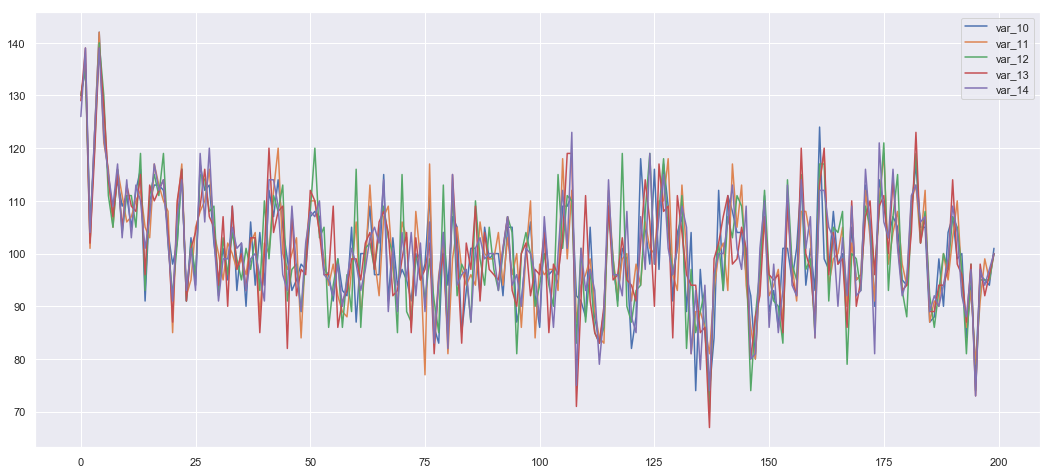

In [380]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

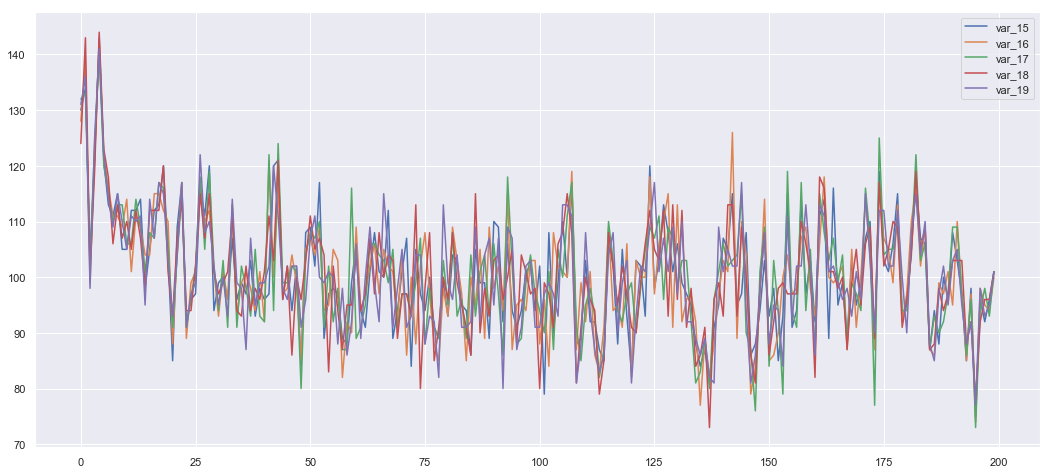

In [381]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

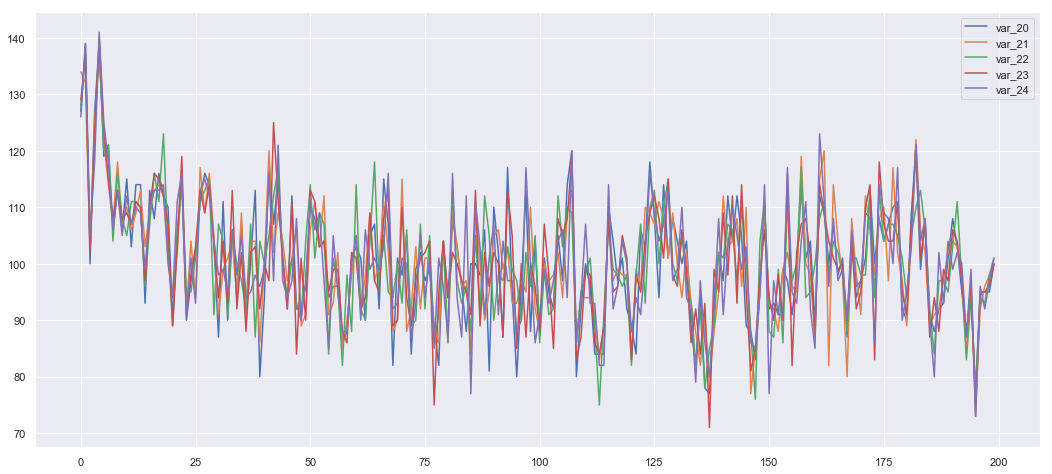

In [382]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

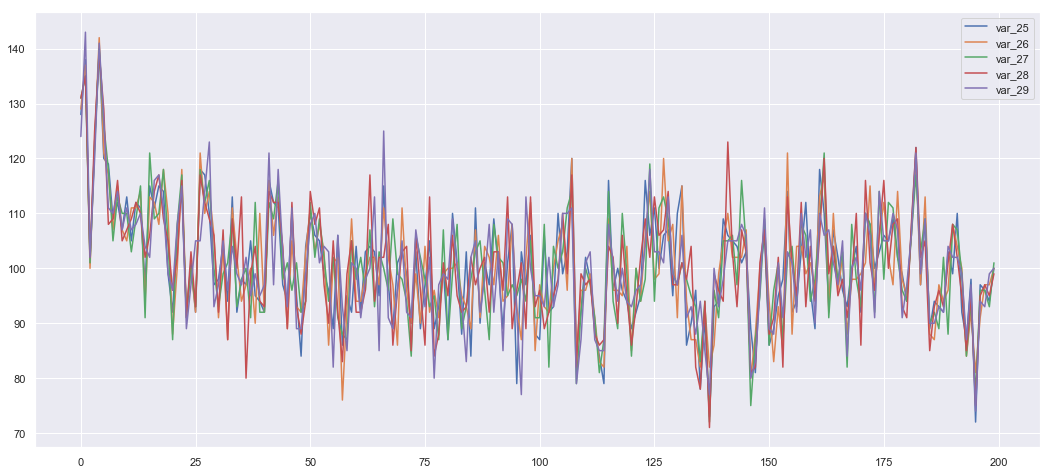

In [383]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

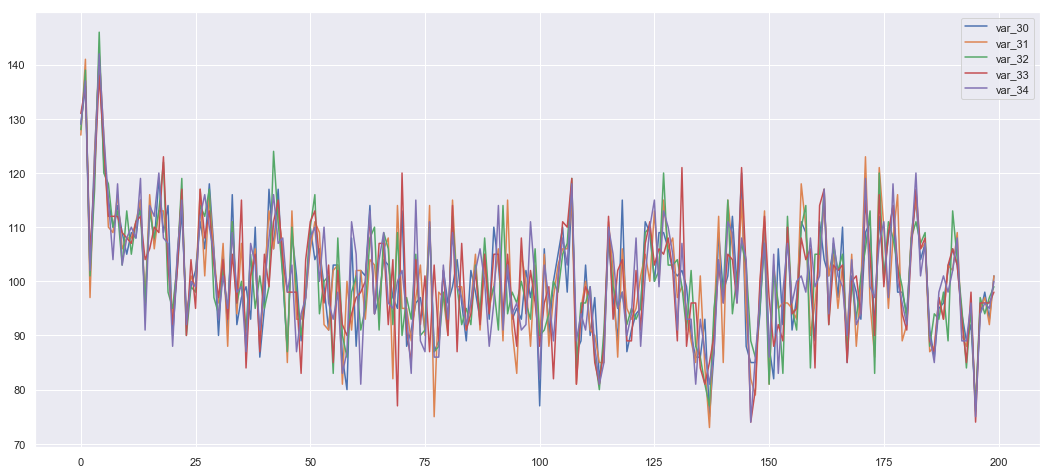

In [384]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

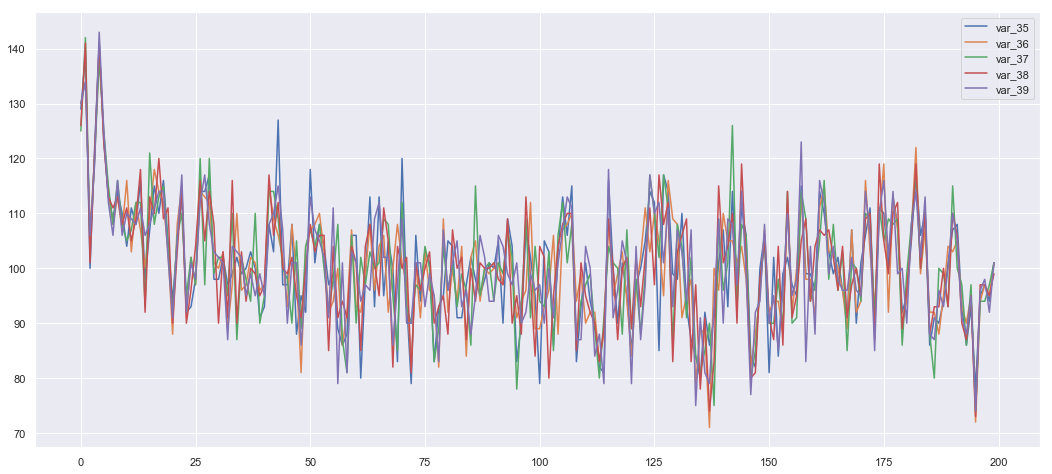

In [385]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

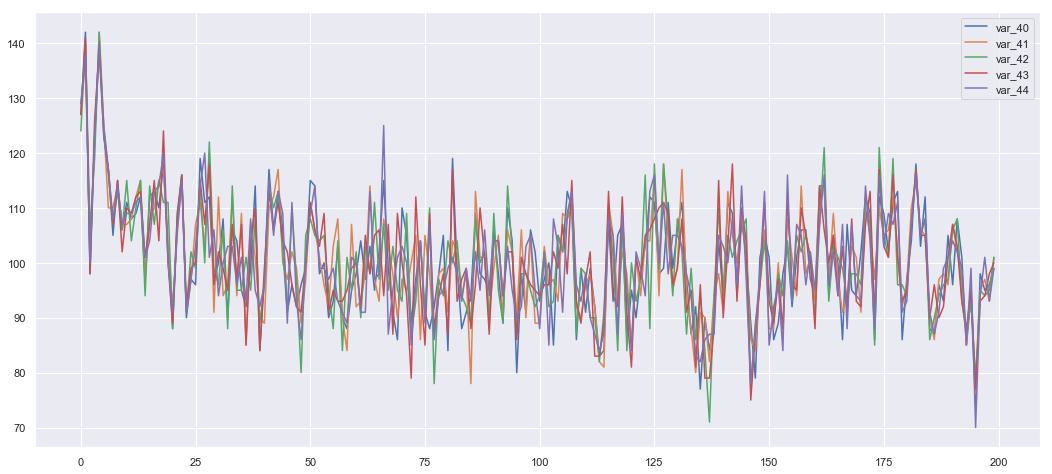

In [386]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

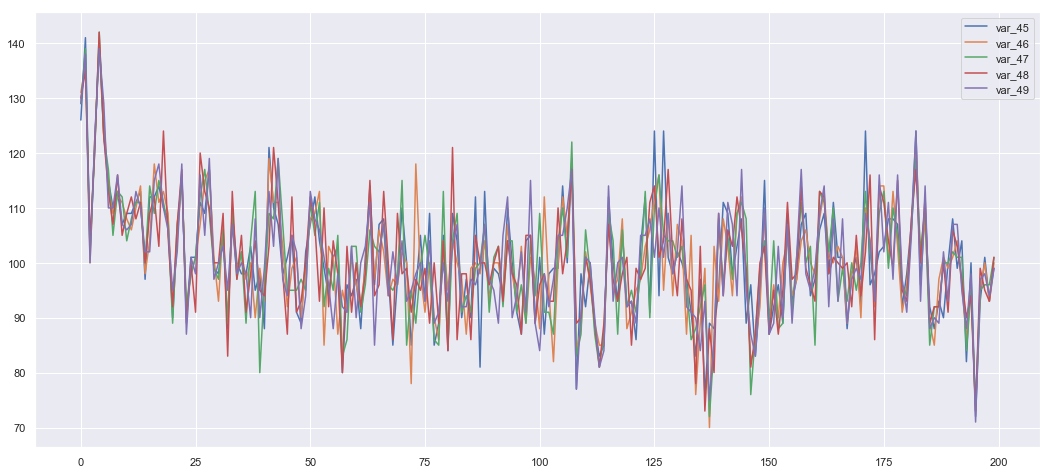

In [387]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

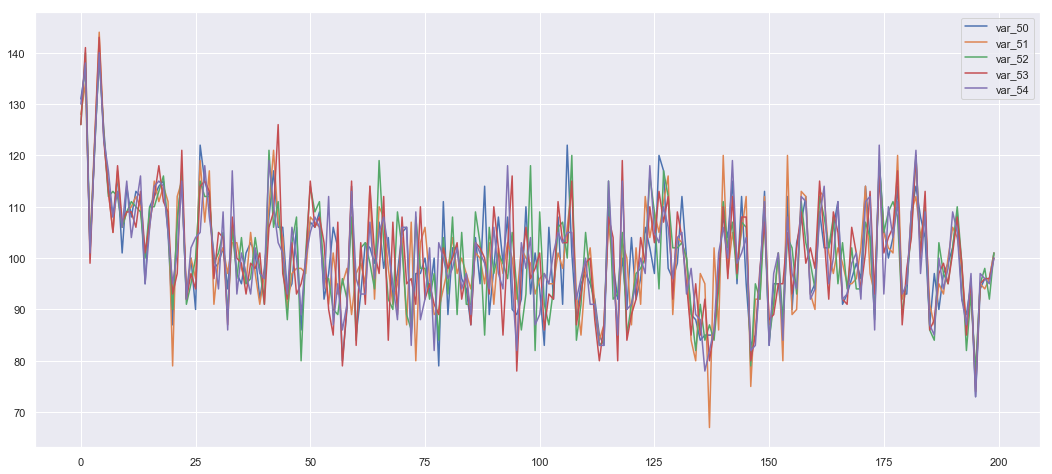

In [388]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

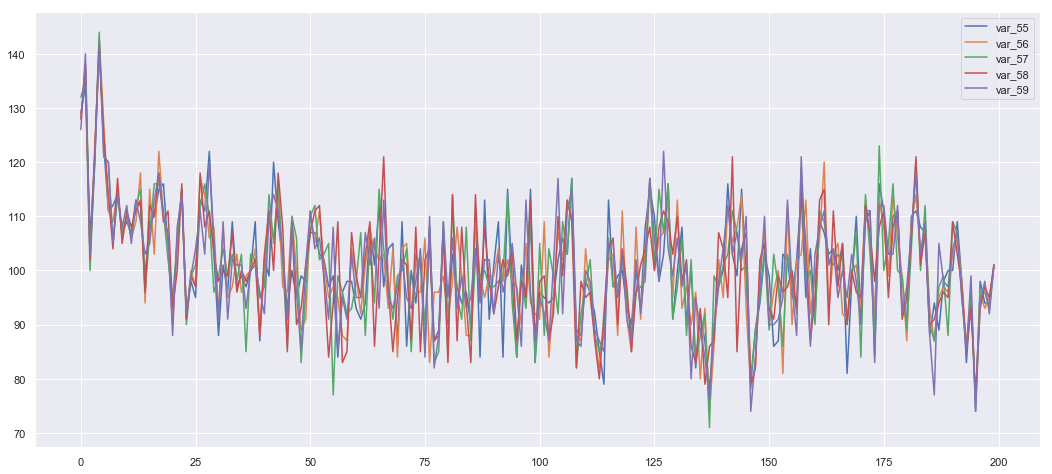

In [389]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

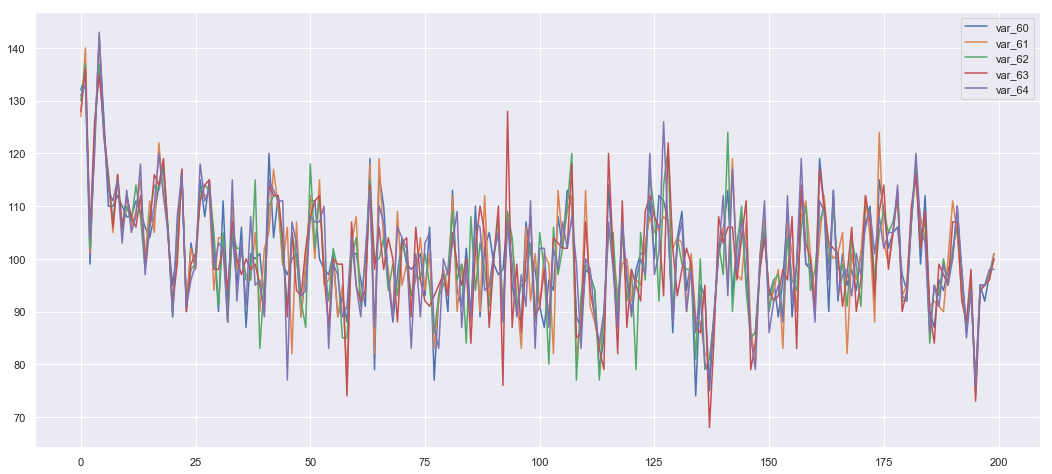

In [390]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

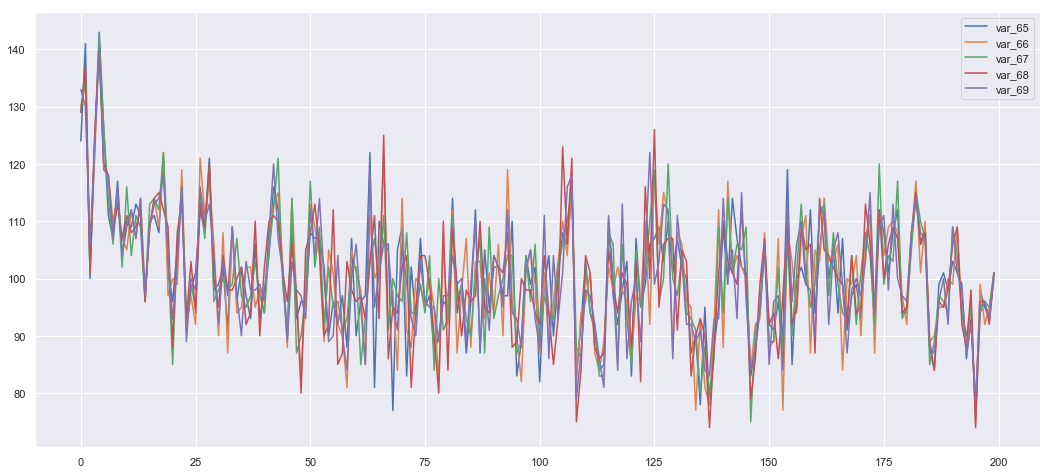

In [391]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

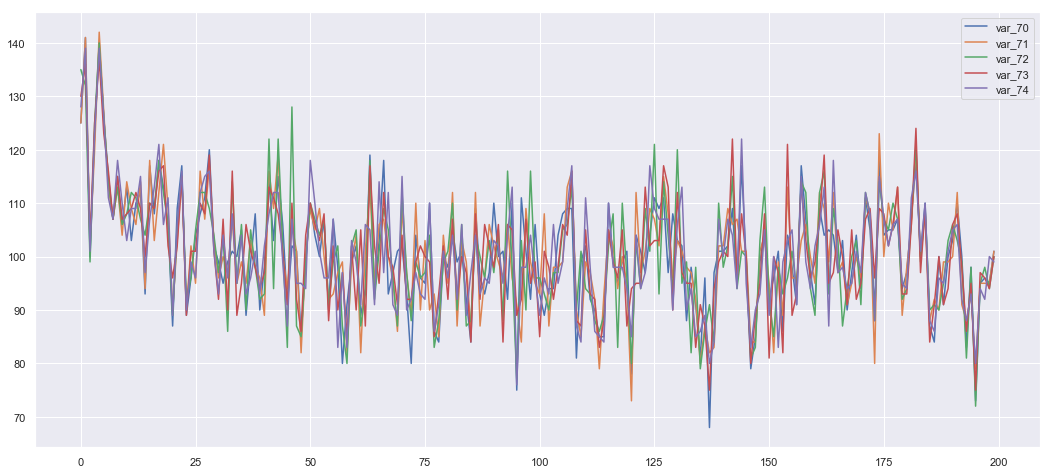

In [392]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

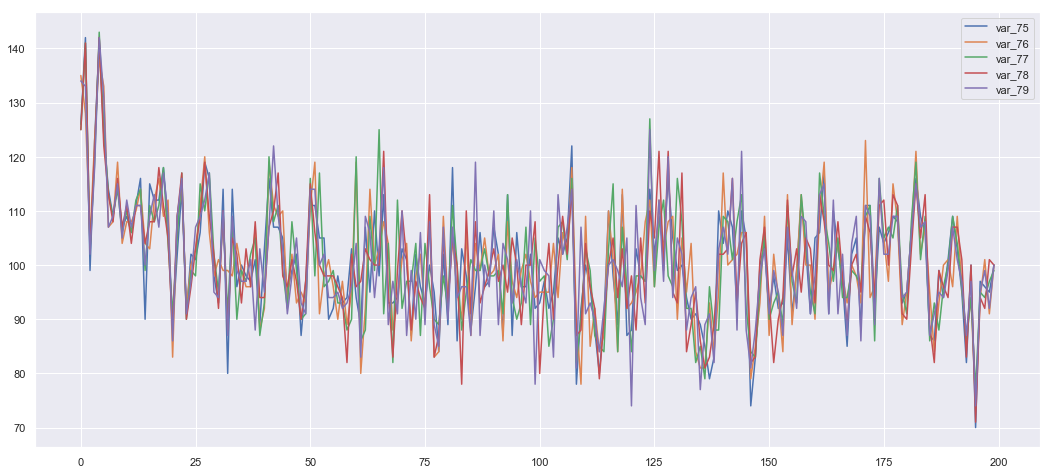

In [393]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

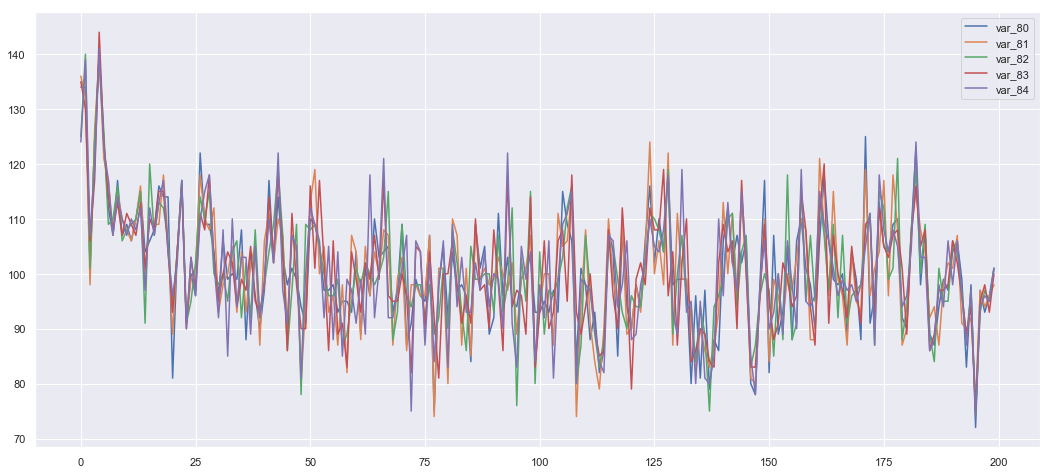

In [394]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

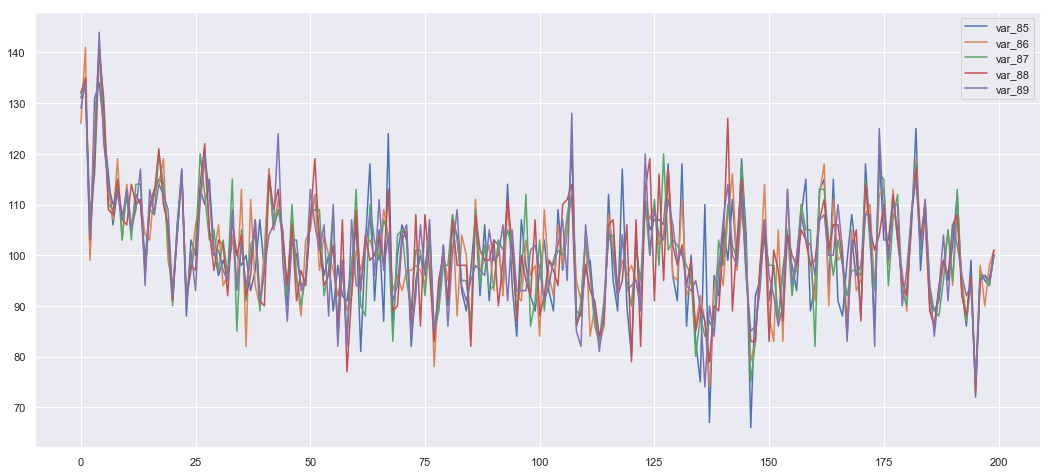

In [395]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

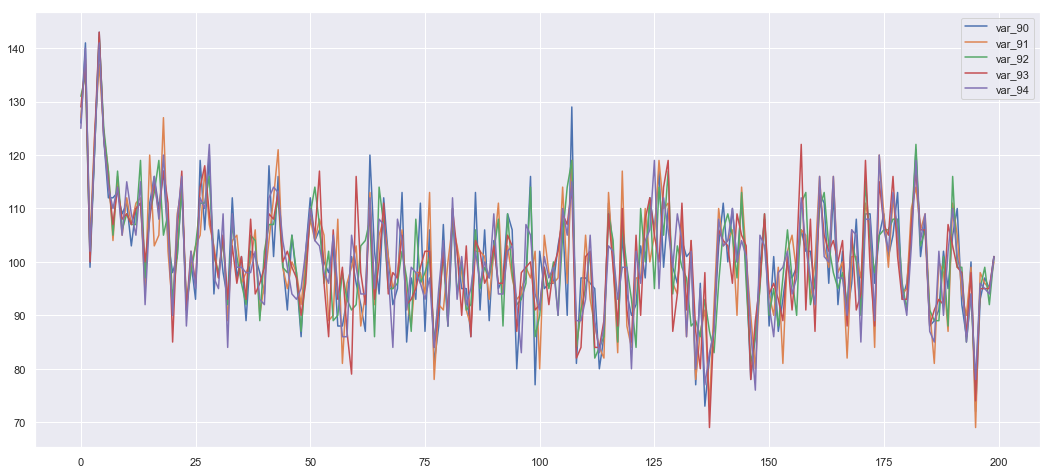

In [396]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

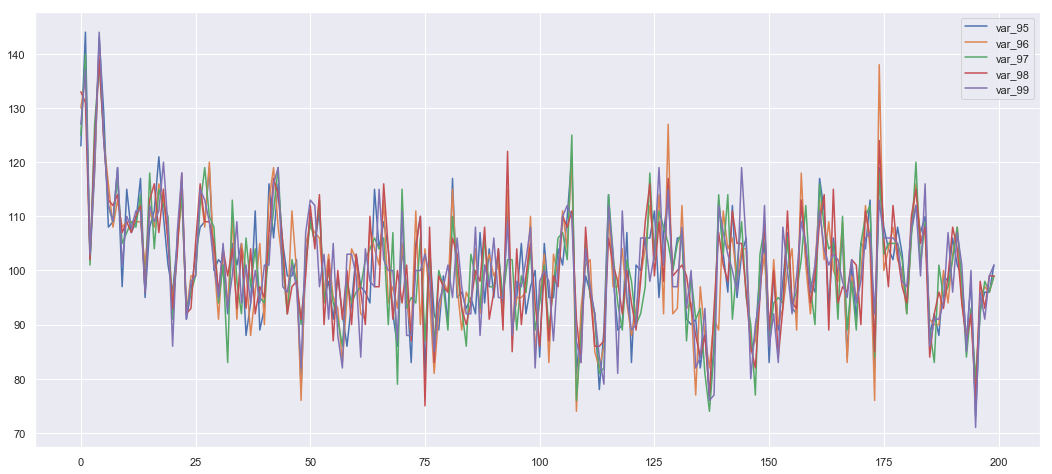

In [397]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

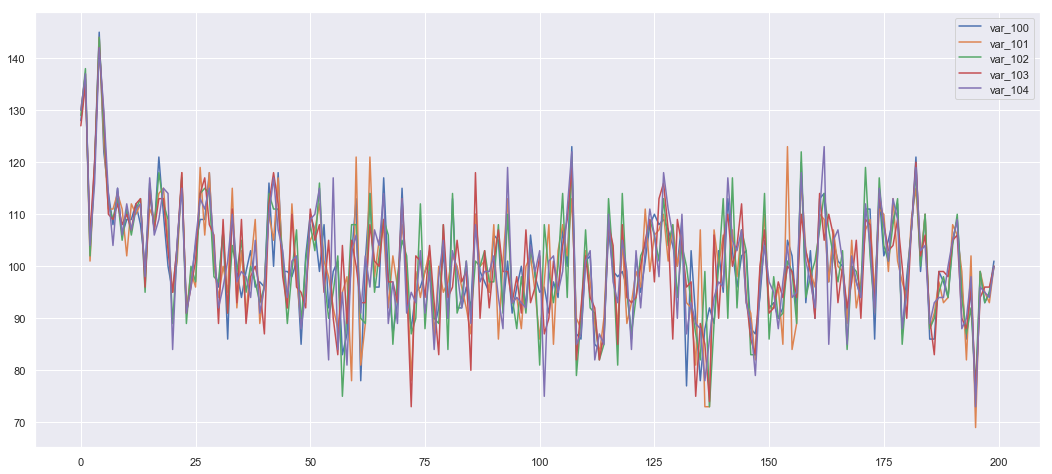

In [398]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

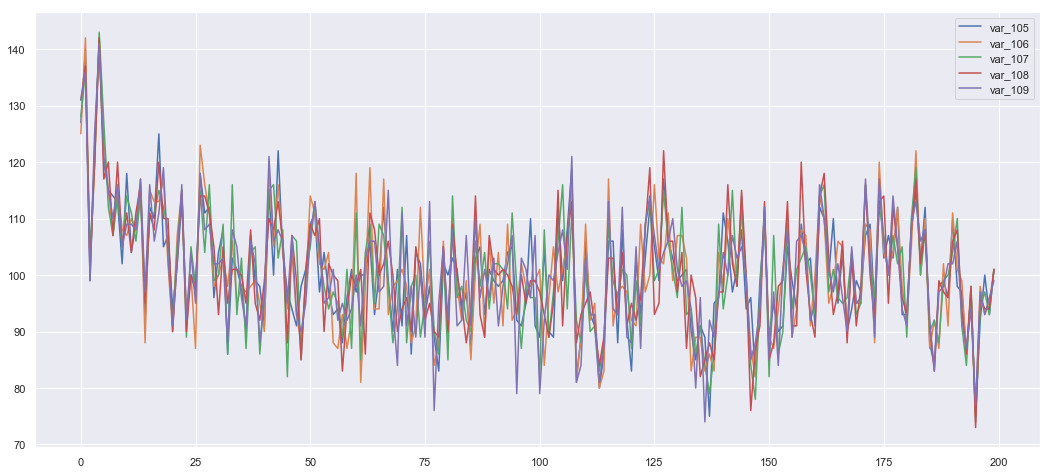

In [399]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

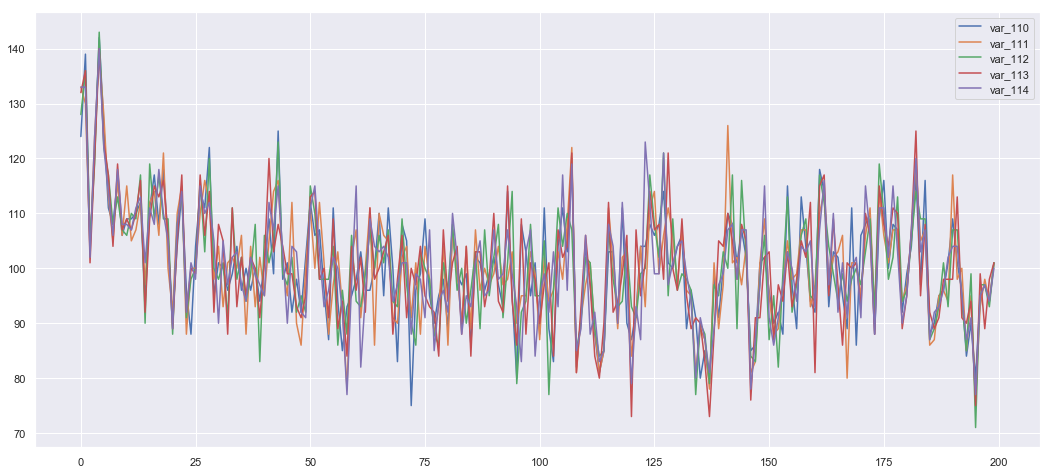

In [400]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

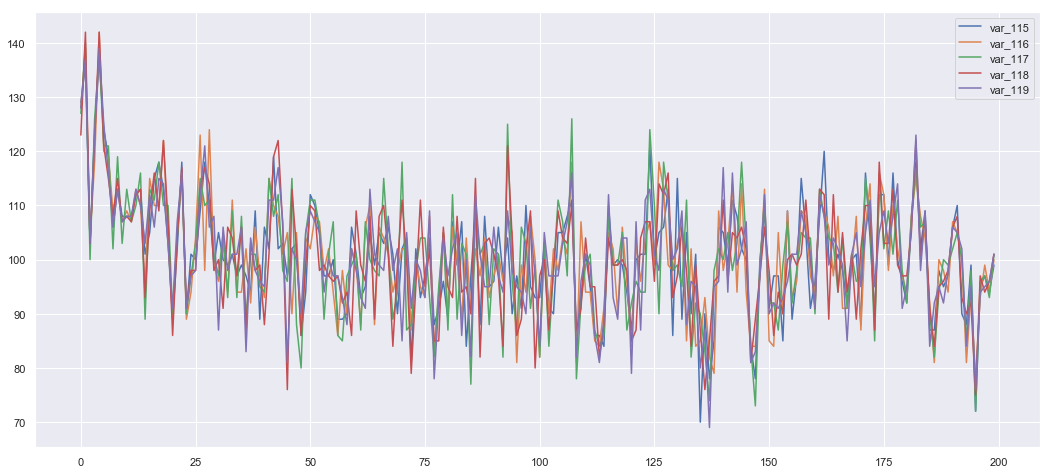

In [401]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

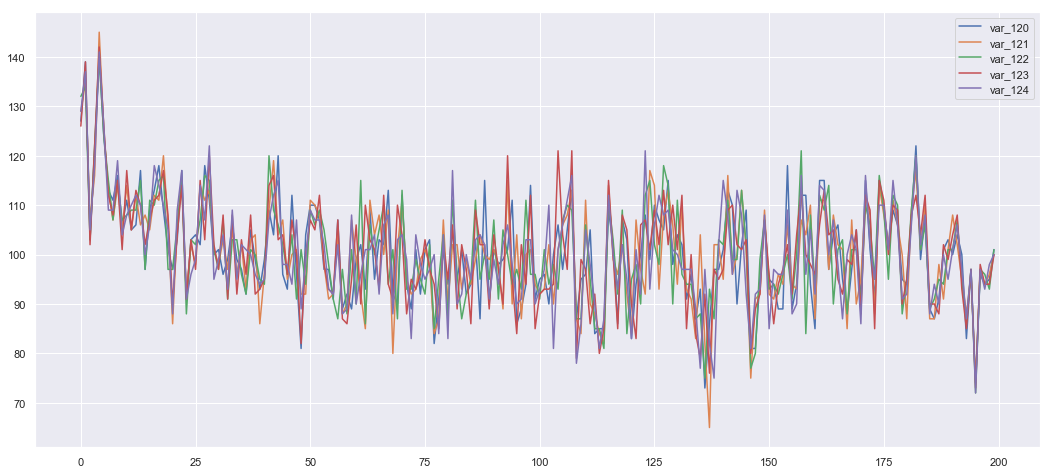

In [402]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

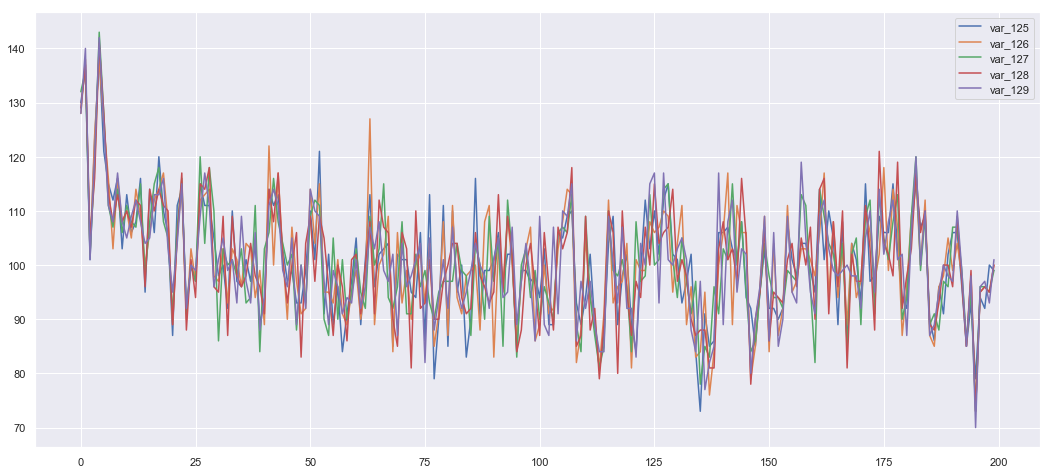

In [403]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

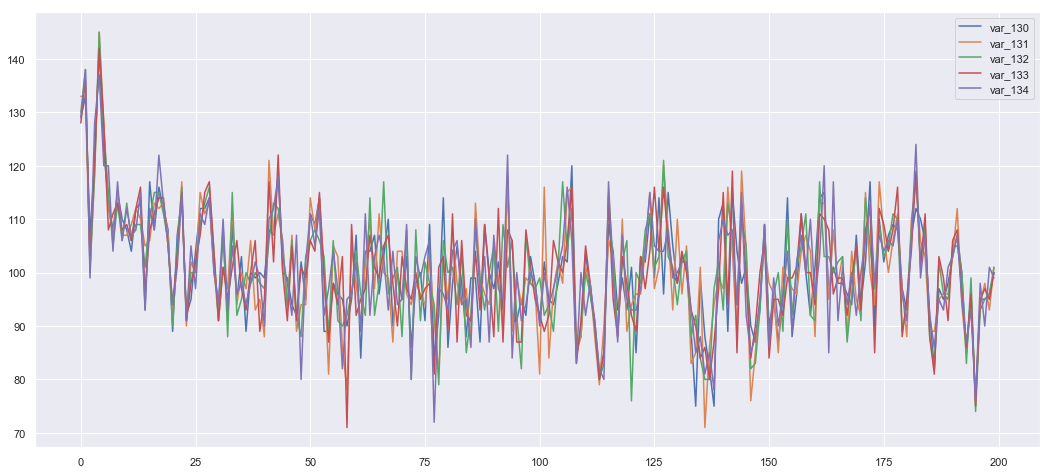

In [404]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

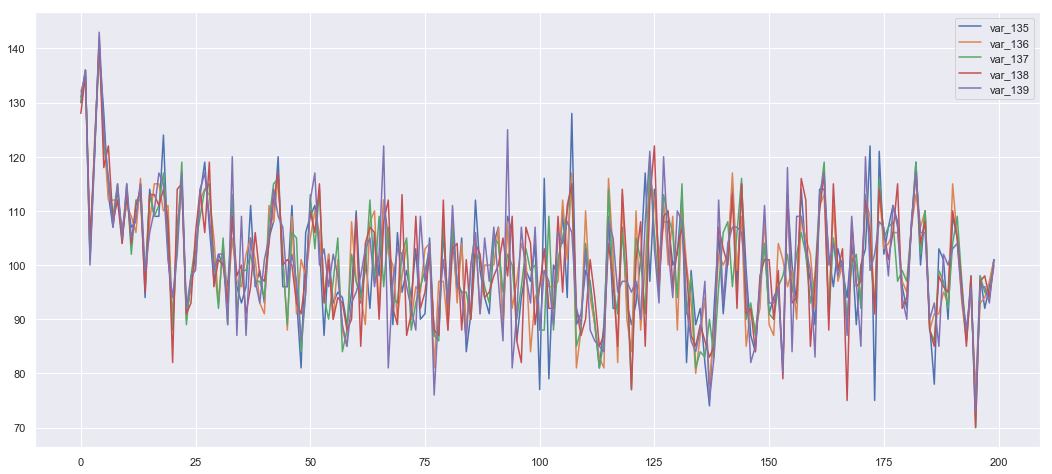

In [405]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

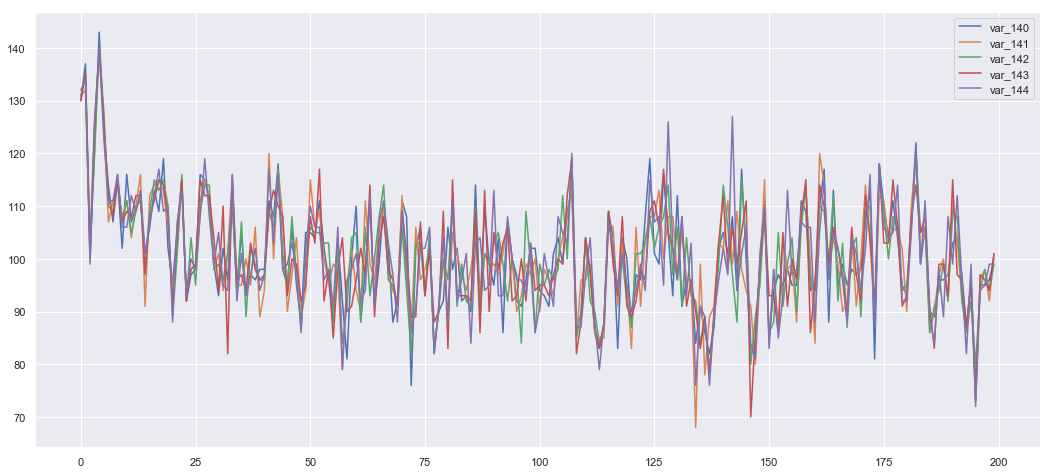

In [406]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

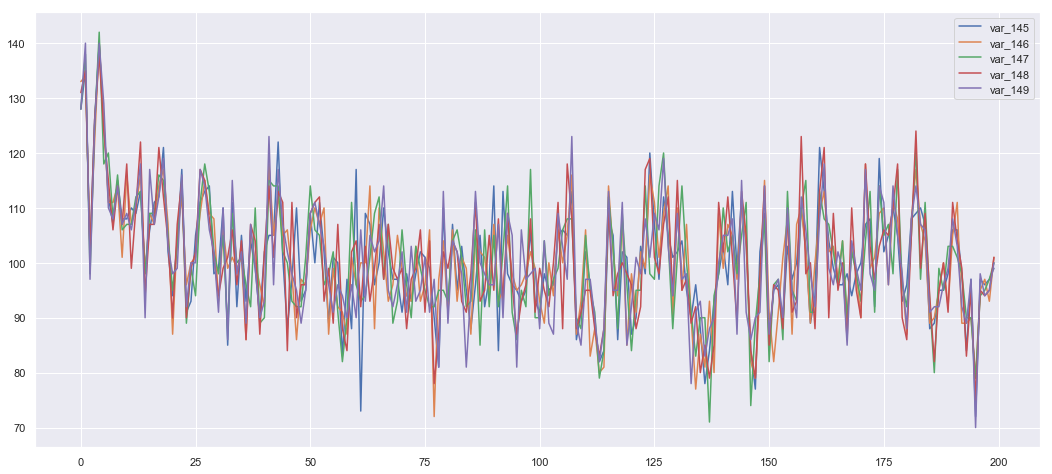

In [407]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

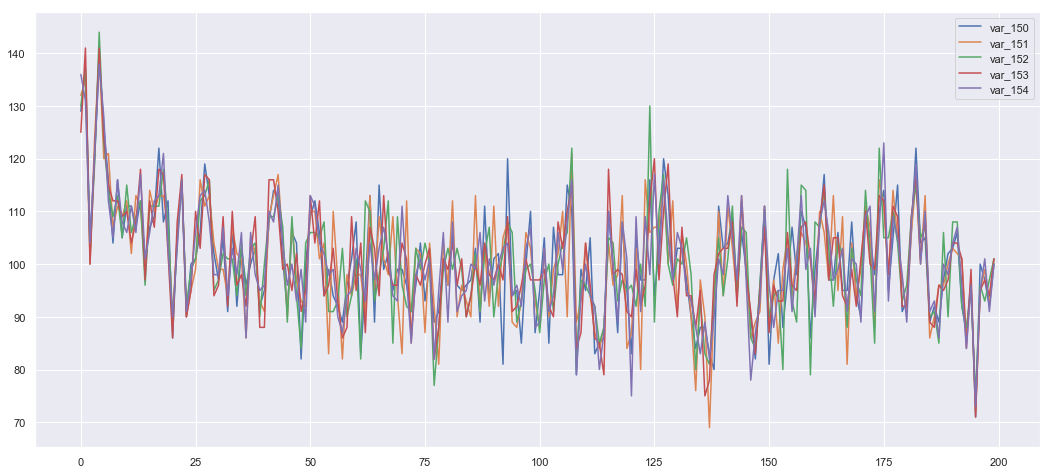

In [408]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

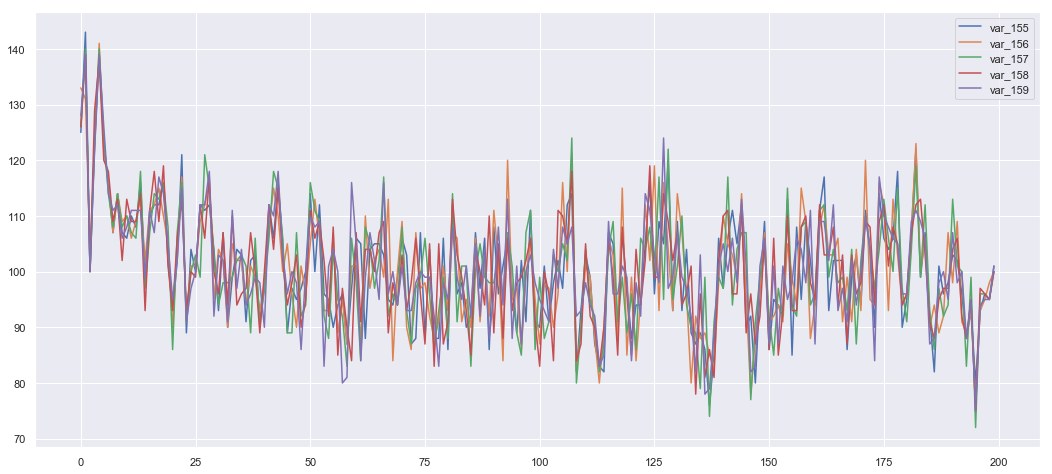

In [409]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

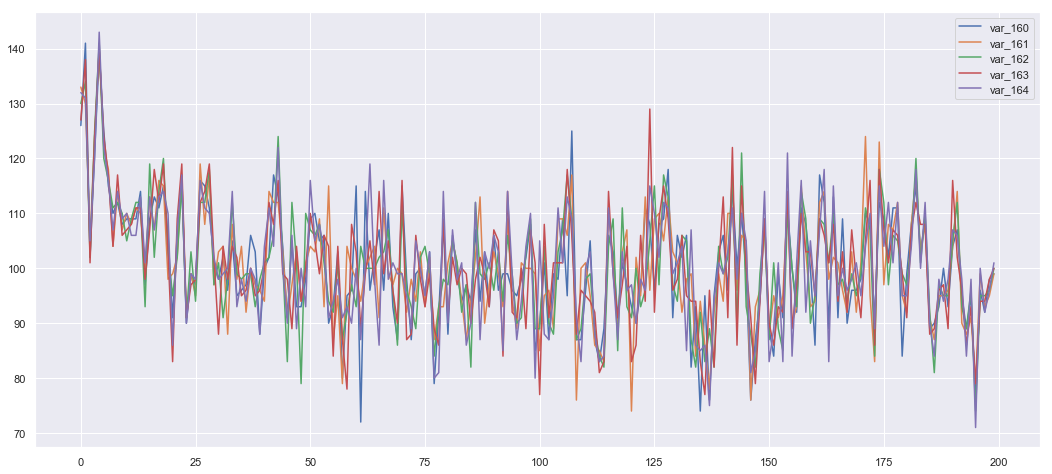

In [410]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

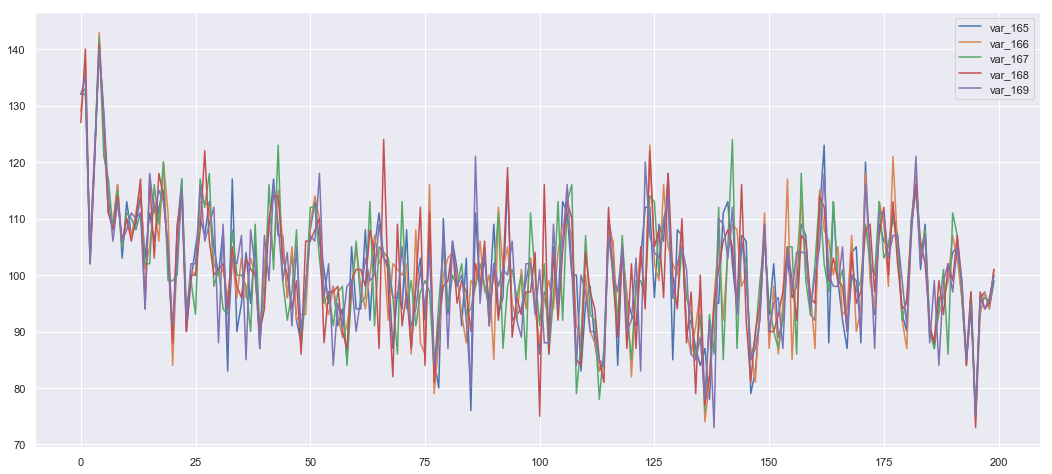

In [411]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

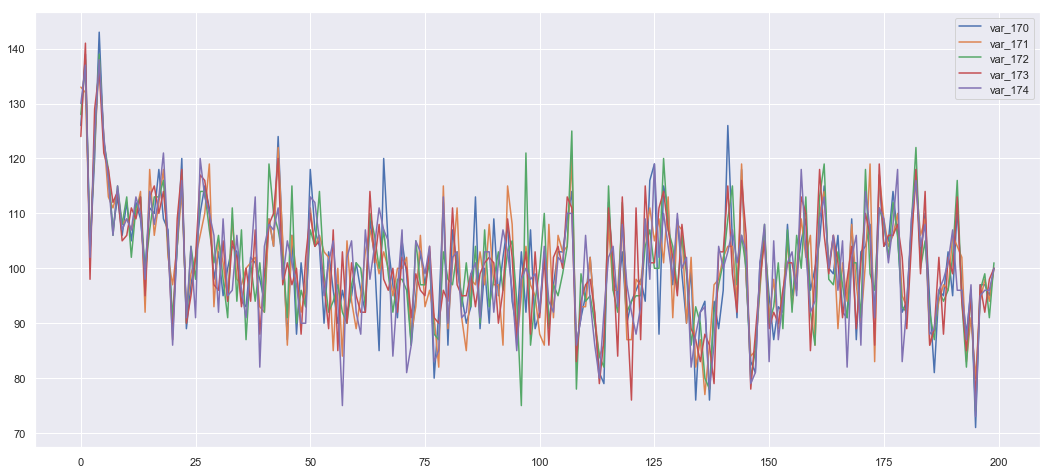

In [412]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

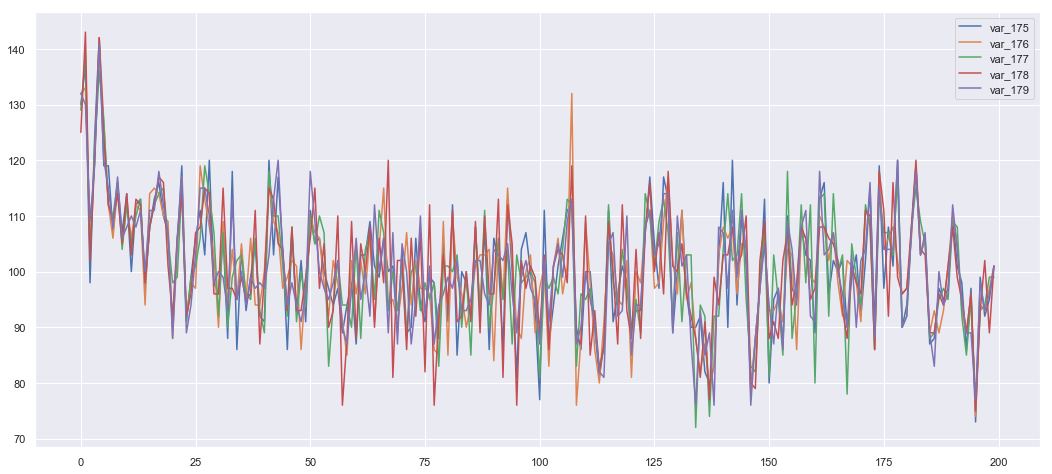

In [413]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

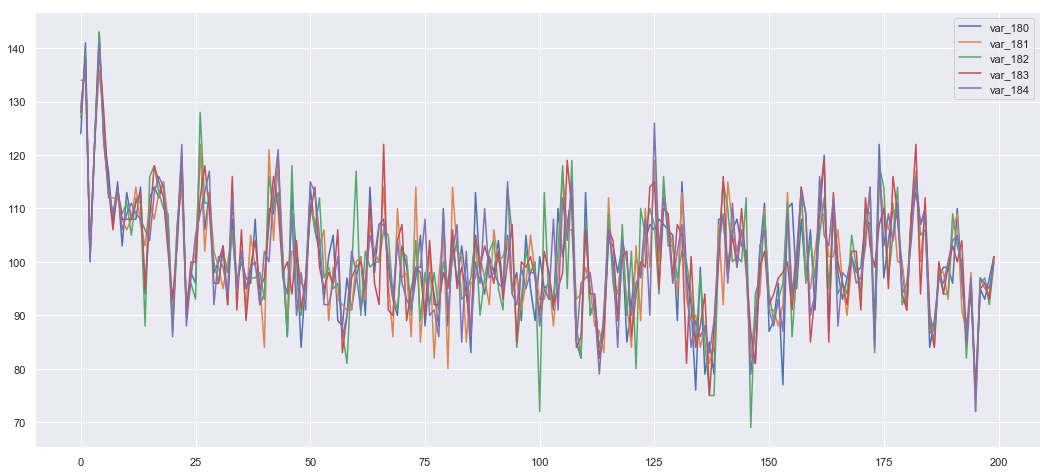

In [414]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

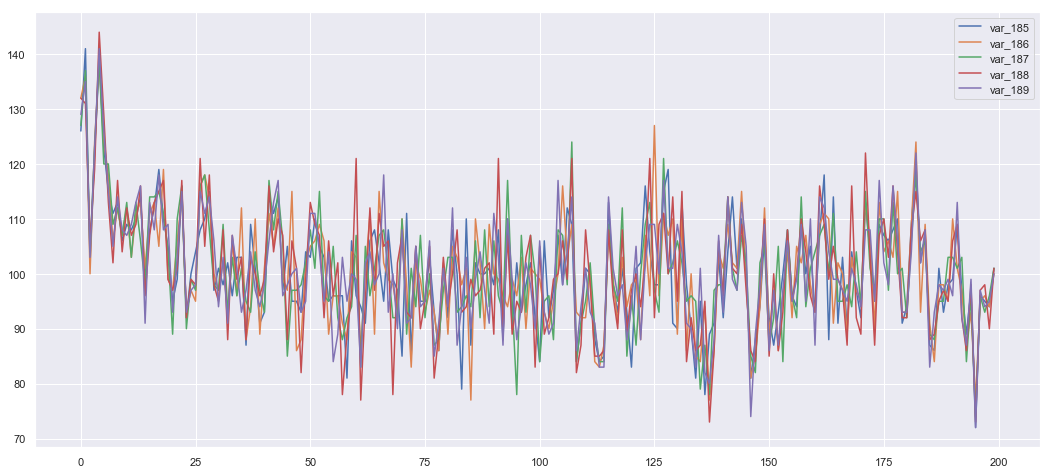

In [415]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

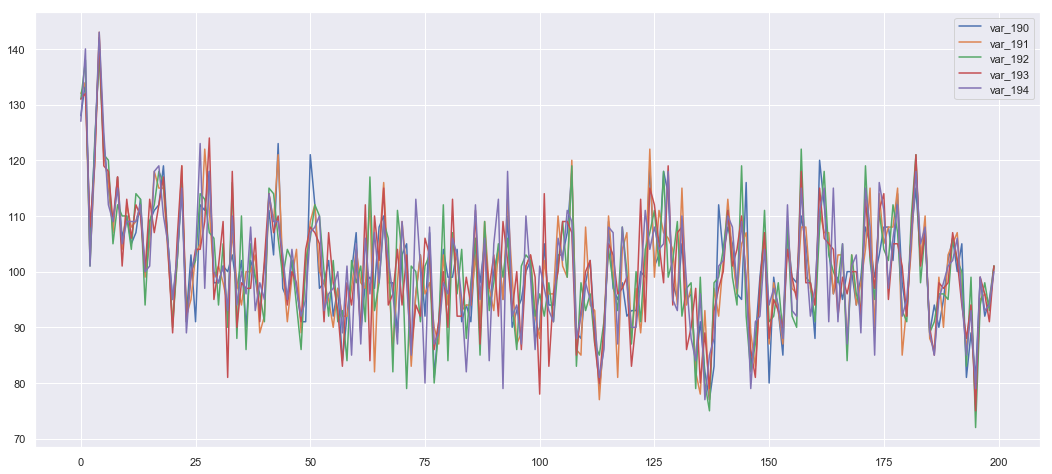

In [416]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

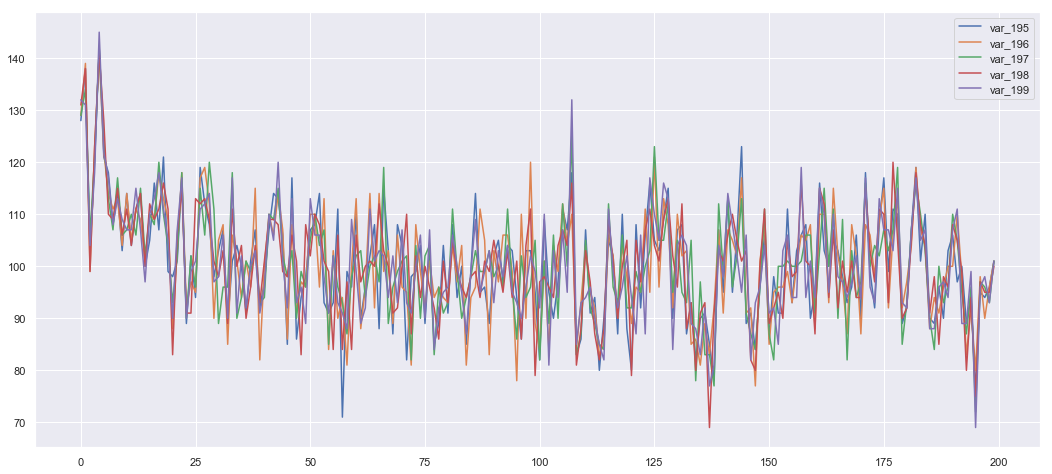

In [417]:
plt.figure(figsize=(18, 8))
for col in col_list[idx * 5:(idx + 1) * 5]:
    plt.plot(time_series.loc[col], label=col)
plt.legend()
idx += 1

## var_108

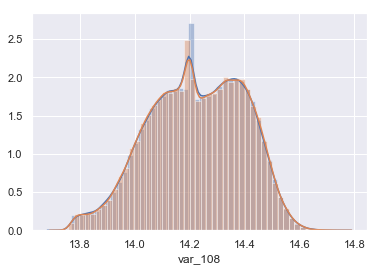

In [445]:
sns.distplot(train.var_108)